# First Data Science Project
## Melbourne Housing Prices Prediction
Here, we will go through a data challenge using data predicting housing prices in Melbourne, Australia. 

The data is from Kaggle and can be found [here](https://www.kaggle.com/anthonypino/melbourne-housing-market)

In [1]:
import numpy as np
import pandas as pd

In [2]:
pwd

'/Users/samson.afolabi/Documents/DSR/Data Science Fundamentals/DSR_DS_Fundamental/ds_from_scratch'

## 1. Initial Data Understanding
Here, we get to know our data and try to figure out next steps for modelling.

A goal in this step is to get to know what types of data cleaning, preparation and encoding we need to do in order to prepare our data for inclusion in a model.

Since we are predicting price, this is a supervised regression problem.

In [3]:
full_data = pd.read_csv("../data/Melbourne_housing_FULL.csv")

In [4]:
full_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [5]:
full_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [6]:
full_data.shape

(34857, 21)

In [7]:
full_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [8]:
full_data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [9]:
# getting number of rows with null price.
# since we are trying to predict price, we will need to drop these. 
print("Total number of rows in data set is: ", full_data.shape[0])
print("Number of rows with missing price is: ",  full_data.loc[full_data.loc[:, "Price"].isnull()].shape[0])

Total number of rows in data set is:  34857
Number of rows with missing price is:  7610


## 2. Data Cleaning (and further understanding & analysis)
Now that we have a very rough understanding of our data, we can move on to dealing with more of the null values.

Data cleaning, understanding, and analysis are iterative processes. Often times, as we do analysis, we will find columns or rows that need to be cleaned, and as we are cleaning, we may get ideas for additional analysis we want to do. 

In [10]:
#remove null values from Price
data = full_data.loc[~full_data.loc[:, "Price"].isnull()]

In [11]:
data.shape

(27247, 21)

In [12]:
data.loc[:, "Regionname"].isnull().any()

True

In [13]:
# checking to see how many null values we have in each of the other columns
columns_with_nulls = []
for column in data.columns:
    if data.loc[:, column].isnull().any():
        columns_with_nulls.append(column)

for column in columns_with_nulls:
    percent_missing = round(((data.loc[data.loc[:, column].isnull()].shape[0] / data.shape[0]) * 100), 4)
    print("Column {} has {}% missing values \n".format(column, percent_missing))

Column Distance has 0.0037% missing values 

Column Postcode has 0.0037% missing values 

Column Bedroom2 has 23.6393% missing values 

Column Bathroom has 23.6613% missing values 

Column Car has 25.045% missing values 

Column Landsize has 34.0037% missing values 

Column BuildingArea has 60.8911% missing values 

Column YearBuilt has 55.6502% missing values 

Column CouncilArea has 0.011% missing values 

Column Lattitude has 22.953% missing values 

Column Longtitude has 22.953% missing values 

Column Regionname has 0.011% missing values 

Column Propertycount has 0.011% missing values 



Some of the columns which contain a very high amount of missing values, like Latitude, Longitude, can likely be proxied with another column, like Council Area or Regionname (since they are all related to location). 

Similarly, Bedroom2 and Bathroom can likely be reasonably well represented by the Room column.

Building Area concerns the square meters of the property. It's sad that this one contains such a high percentage of missing values, as that would likely give more information than just the number of rooms.

In our first iteration, since we are trying to get a model trained quickly, we will have to leave this one out, or get creative with another way of filling it in. For example, we could fill it in with the average building area from that neighborhood or postcode.

In [14]:
# shape before dropping few nulls
data.shape

(27247, 21)

In [15]:
# for columns with only a very small amount of null values, we will simply drop the nulls that are there.
columns_with_few_nulls = ['Distance',
                          'Postcode',
                          'CouncilArea',
                          'Regionname',
                          'Propertycount']
for column in columns_with_few_nulls:
    data = data.loc[~data.loc[:, column].isnull()]

In [16]:
# shape after dropping few nulls
data.shape

(27244, 21)

In the end, we only dropped 3 rows.
This likely means that many of the null values for different columns were in the same row.

In [17]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [18]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0


In [19]:
# updating our "columns_with_nulls" list
columns_with_nulls = []
for column in data.columns:
    if data.loc[:, column].isnull().any():
        columns_with_nulls.append(column)
columns_with_nulls

['Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Lattitude',
 'Longtitude']

In [20]:
percent_columns_with_nulls = (len(columns_with_nulls) / len(data.columns)) * 100
print("Percentage of columns still containing missing values: {}".format(percent_columns_with_nulls))

Percentage of columns still containing missing values: 38.095238095238095


For our first model iteration, we will drop the roungly 1/3 of our columns that still contain null values. 

## 2.1 Train-Test Split:
To prevent data leakage, we will do our train/test split now, to hold out one part of the dataset completely away as the holdout set.

In [21]:
data = data.drop(columns=columns_with_nulls)
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'CouncilArea', 'Regionname',
       'Propertycount'],
      dtype='object')

In [22]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,CouncilArea,Regionname,Propertycount
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,Yarra City Council,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,Yarra City Council,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,Yarra City Council,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,Yarra City Council,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,Yarra City Council,Northern Metropolitan,4019.0


In [23]:
data.shape

(27244, 13)

In [24]:
from sklearn.model_selection import train_test_split

# splitting data into features and targets 
x = data.drop(columns="Price")
y = data.loc[:, "Price"]

# Removing 15% of data as holdout or test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [25]:
# putting x & y back together for plotting
train_data = pd.concat([x_train, y_train], axis=1)

In [26]:
train_data.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,CouncilArea,Regionname,Propertycount,Price
30365,Footscray,8/4 Empire St,2,u,SP,Barry,9/12/2017,5.1,3011.0,Maribyrnong City Council,Western Metropolitan,7570.0,315000.0
15124,Mentone,70 Voltri St,3,h,S,hockingstuart,3/06/2017,20.0,3194.0,Kingston City Council,South-Eastern Metropolitan,6162.0,885000.0
11934,Oakleigh,1/62 Golf Links Av,3,u,S,Ray,18/03/2017,14.0,3166.0,Monash City Council,Southern Metropolitan,3224.0,849500.0
20766,Preston,38 Spring St,3,h,S,Barry,9/09/2017,8.4,3072.0,Darebin City Council,Northern Metropolitan,14577.0,947500.0
16150,Carlton North,454 Canning St,3,h,S,Nelson,24/06/2017,3.5,3054.0,Melbourne City Council,Northern Metropolitan,3106.0,1717500.0


### 2.2 Visualizations
Doing more visualizations to see which types of columns could be potentially helpful for us for predicting our target variable of price.

Before plotting locations, looking at how the locations relate to oneanother.

Suburb is the most precise, followed by postcode and then council area. Region is the least precise.

In [27]:
train_data.loc[:, 'Suburb'].nunique()

344

In [28]:
train_data.loc[:, 'Postcode'].nunique()

209

In [29]:
train_data.loc[:, 'CouncilArea'].nunique()

33

In [30]:
train_data.loc[:, 'Regionname'].nunique()

8

Looking at price spread by different levels of location information

In [31]:
avg_price_by_suburb = data.groupby("Suburb").mean()['Price'].sort_values(ascending=False)
avg_price_by_councilarea = data.groupby("CouncilArea").mean()['Price'].sort_values(ascending=False)
avg_price_by_region = data.groupby("Regionname").mean()['Price'].sort_values(ascending=False)

In [32]:
avg_price_by_suburb.describe().round()

count        344.0
mean      920490.0
std       345358.0
min       380000.0
25%       659870.0
50%       841956.0
75%      1079125.0
max      2386271.0
Name: Price, dtype: float64

In [33]:
avg_price_by_councilarea.describe().round()

count         33.0
mean      907368.0
std       313692.0
min       414400.0
25%       683237.0
50%       886031.0
75%      1103285.0
max      1667326.0
Name: Price, dtype: float64

In [34]:
avg_price_by_region.describe().round()

count          8.0
mean      855927.0
std       295612.0
min       432607.0
25%       690509.0
50%       849550.0
75%       935443.0
max      1395928.0
Name: Price, dtype: float64

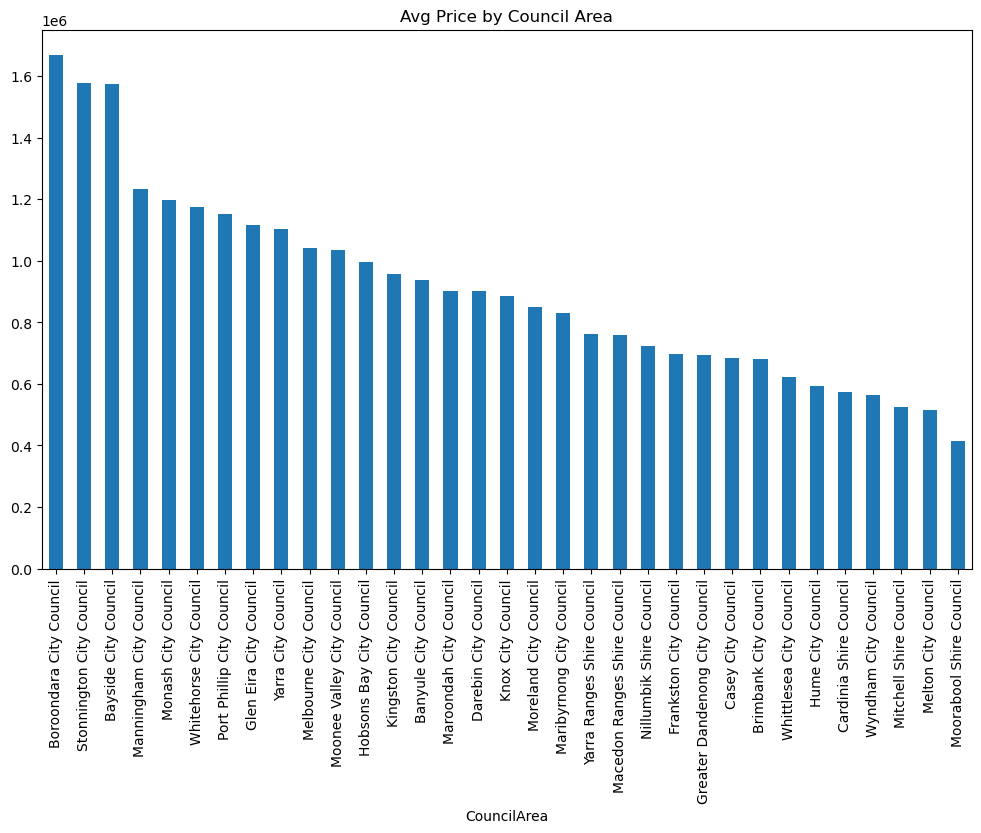

In [35]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, figsize=(12,7))

avg_price_by_councilarea.plot(ax=ax, kind='bar')

ax.set_title('Avg Price by Council Area')

fig;

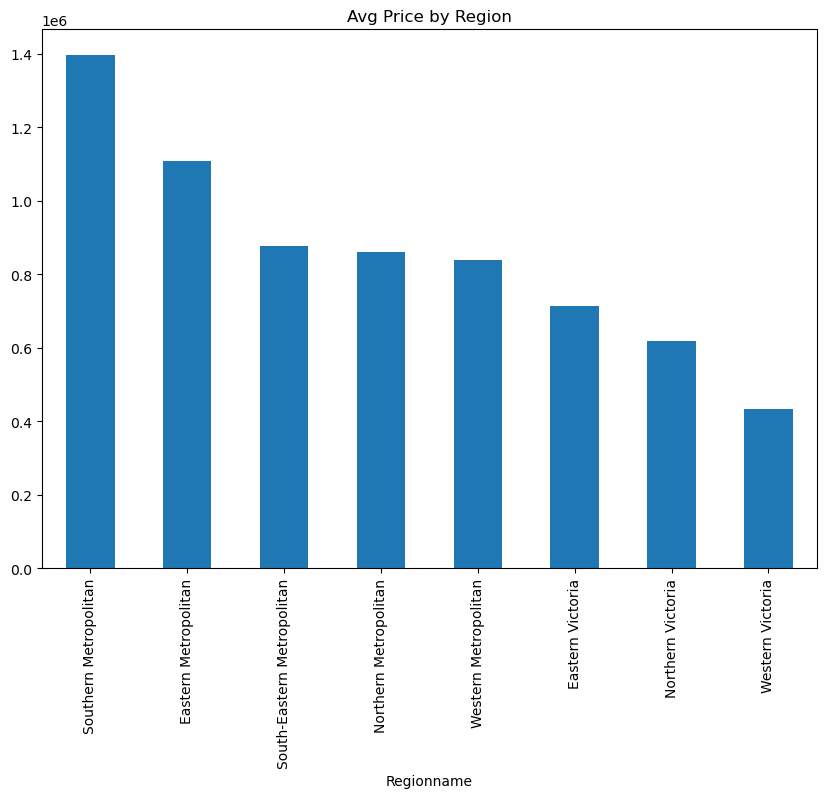

In [36]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, figsize=(10,7))

avg_price_by_region.plot(ax=ax, kind='bar')

ax.set_title('Avg Price by Region')

fig;

#### Seller Analysis
The "SellerG" column naming the real estate agent who sold the house could be interesting. Maybe there is one "rock star" agent who makes drastically more than the others. 

There is definitely a large spread between the agents. Some have an average house sale that is one OOM larger than the others.

In [37]:
train_data.groupby("SellerG")["Price"].mean().round().sort_values(ascending=False)

SellerG
For                        3780000.0
Weast                      3320000.0
Darras                     2950000.0
VICProp                    2797667.0
Sotheby's                  2570625.0
                             ...    
Mindacom                    400000.0
hockingstuart/Village       345000.0
hockingstuart/Advantage     330000.0
Rosin                       330000.0
Sweeney/Burnham             325000.0
Name: Price, Length: 334, dtype: float64

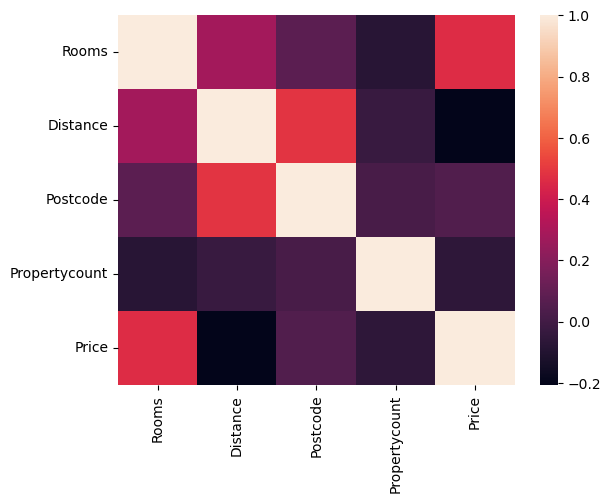

In [38]:
import seaborn as sns
sns.heatmap(train_data.corr())


plt.show()

## 3. Feature Engineering

We have now seen that many of our categorical columns have a very large number of possible values (some with 200-300). 

This is too many to encoding using One Hot Encoding. 

So instead, we will use mean encoding, putting the average price for each of the potential category values as its new value.

**This helps us get all the columns to numeric format, for use in modelling!**

In [39]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,CouncilArea,Regionname,Propertycount
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,Yarra City Council,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,Yarra City Council,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,Yarra City Council,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,Yarra City Council,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,Yarra City Council,Northern Metropolitan,4019.0


In [40]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'CouncilArea', 'Regionname',
       'Propertycount'],
      dtype='object')

We will also drop "Address", since it is unique to the property and thus very unlikely to help our model learn.
For the location variables, we will just keep one.


All the rest we will mean encode, and then get started with modeling!

For this initial stage of modeling, we will also drop the column "Method".

In [41]:
train_data = train_data.drop(columns=['Address', 'Method', 'CouncilArea', 'Regionname', 'Postcode'])

In [42]:
train_data.columns

Index(['Suburb', 'Rooms', 'Type', 'SellerG', 'Date', 'Distance',
       'Propertycount', 'Price'],
      dtype='object')

In [43]:
columns_to_mean_encode = ['Suburb', 'Type', 'SellerG']

In [61]:
def mean_encode(data, col, on):
    group = data.groupby(col).mean()
    data.loc[:, col+'-original'] = data.loc[:, col]
    mapper = {k: v for k, v in zip(group.index, group.loc[:, on].values)}

    data.loc[:, col] = data.loc[:, col].replace(mapper)
    data.loc[:, col].fillna(value=np.mean(data.loc[:, col]), inplace=True)
    return data.loc[:, col],mapper

for col in columns_to_mean_encode:
    train_data.loc[:, col],mapper = mean_encode(train_data.copy(), col, "Price")

Now, nearly all of our columns are in numeric format, except for date. So, for this first round of modeling, we will also drop date. We can always pick it back up in the future.

In [62]:
mapper

{325000.0: 325000.0,
 330000.0: 330000.0,
 345000.0: 345000.0,
 400000.0: 400000.0,
 405000.0: 405000.0,
 408736.84210526315: 408736.84210526315,
 427000.0: 427000.0,
 442000.0: 442000.0,
 445000.0: 445000.0,
 460000.0: 460000.0,
 472500.0: 472500.0,
 477500.0: 477500.0,
 480000.0: 480000.0,
 482100.0: 482100.0,
 490000.0: 490000.0,
 491850.0: 491850.0,
 492000.0: 492000.0,
 501815.3846153846: 501815.3846153846,
 502500.0: 502500.0,
 510000.0: 510000.0,
 514500.0: 514500.0,
 517500.0: 517500.0,
 520000.0: 520000.0,
 526187.5: 526187.5,
 528000.0: 528000.0,
 531115.3846153846: 531115.3846153846,
 536666.6666666666: 536666.6666666666,
 537000.0: 537000.0,
 540000.0: 540000.0,
 542327.5862068966: 542327.5862068966,
 543000.0: 543000.0,
 547800.0: 547800.0,
 548000.0: 548000.0,
 552000.0: 552000.0,
 553000.0: 553000.0,
 560153.8461538461: 560153.8461538461,
 562000.0: 562000.0,
 562500.0: 562500.0,
 570000.0: 570000.0,
 570202.380952381: 570202.380952381,
 573500.0: 573500.0,
 575000.0: 57

In [60]:
for col in columns_to_mean_encode:
    x_test.loc[:, col] = mean_encode(x_test.copy(), col, "Price")

KeyError: 'Price'

In [45]:
train_data.dtypes

Suburb           float64
Rooms              int64
Type             float64
SellerG          float64
Date              object
Distance         float64
Propertycount    float64
Price            float64
dtype: object

In [46]:
train_data = train_data.drop(columns=['Date'])

In [47]:
train_data.dtypes

Suburb           float64
Rooms              int64
Type             float64
SellerG          float64
Distance         float64
Propertycount    float64
Price            float64
dtype: object

Now all of our data is in numeric format! We can now start modeling. 

## 4. Initial Baseline Modeling

In [48]:
# splititng features and target back apart
x_train = train_data.copy(deep=True).drop(columns=["Price"])
y_train = train_data.loc[:, "Price"]

In [49]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [50]:
# defining evaluation metric
def compute_rmse(actual, prediction):
    """
    Computs RMSE (root mean squared error) between predictions from a model
    and the actual values of the target variable.
    """
    
    rmse = sqrt(mean_squared_error(actual, prediction))
    
    # rounding to 2 decimal places
    print('RMSE is ', round(rmse,2))
    
    return rmse

### Step 1: Lazy Estimator
Simply predicting the mean price for every house.

In [51]:
lazy_estimator_predictions = pd.DataFrame(y_train.copy())

# using median of entire training set
lazy_estimator_predictions.loc[:,'lazy_predicted_price'] = y_train.mean()
lazy_estimator_predictions.head().round()

,Price,lazy_predicted_price
30365,315000.0,1048024.0
15124,885000.0,1048024.0
11934,849500.0,1048024.0
20766,947500.0,1048024.0
16150,1717500.0,1048024.0


With the lazy estimator, we are on average $639,810.92 dollars off in our predictions.

In [52]:
lazy_estimator_rmse = compute_rmse(y_train, lazy_estimator_predictions.loc[:, 'lazy_predicted_price'])

RMSE is  639810.92


### Step 2: Initial ML Model
Since this is a regression problem, we will start with linear regression as our model. 


In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(x_train, y_train)
linear_regression_predictions = linear_regression_model.predict(x_train)

Just using a simple linear regression cut our RMSE almost in half over the lazy estimator!

In [55]:
linear_regression_rmse = compute_rmse(y_train, linear_regression_predictions)

RMSE is  392617.87


### Step 3: More Sophisticated ML Model
We'll use a random forest, because it:
- is easy to implement
- gives feature importances
- can handle both integer and float values well

In [56]:
from sklearn.ensemble import RandomForestRegressor

In [57]:
random_forest_model = RandomForestRegressor()
random_forest_model.fit(x_train, y_train)
random_forest_predictions = random_forest_model.predict(x_train)

Training an out-of-the-box random forest further decreased our RMSE.

In [58]:
random_forest_rmse = compute_rmse(y_train, random_forest_predictions)

RMSE is  238039.87


In [59]:
random_forest_test_pred = random_forest_model.predict(x_test)
random_forest_rmse = compute_rmse(y_test, random_forest_test_pred)

/Users/samson.afolabi/opt/anaconda3/envs/f2m/lib/python3.7/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Address
- CouncilArea
- Date
- Method
- Postcode
- ...
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: could not convert string to float: 'Reservoir'

In [74]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
X, y = load_digits(return_X_y=True)
X.shape
X_new = SelectKBest(chi2, k=20).fit_transform(X, y)